# FUTURE WORK Persona: King County government officals

Framing some possible questions from the POV of County government officals. Residential property tax assessors, county/city planning that want to learn about economic factors/data related to Residential property. Here are examples;

Does my zip code price out residents? Does the city/county need to work on making homes more affordable?
Are lots too small/overcrowding/stressing infrastucture? Are there differences in lot size between zip codes?
Are the homes good quality/newer/renovated if older. Are there differences between zip codes in home quality?
What percentage of homes are being renovated? What types of homes (large/small/historic/older) are being renovated?
For property tax assessment purposes, exploring home living area and lot compared to neighbors. Are homes that are larger than neigbhoring homes getting a 'tax break' in being comparied to smaller properties?


In [5]:
# Import the required libraries
import pandas as pd
import numpy as np

import scipy.stats as scs

import matplotlib.pyplot as plt
import seaborn as sns

# set up pandas to display floats in a more human friendly way
pd.options.display.float_format = '{:,.2f}'.format

In [6]:
# config and functions for charting 

sns.set_style(style='ticks')
sns.set_palette(palette='deep')

def plot_grouped_boxplot(plot_x, plot_y, plot_hue, plot_data, pal):
    sns.boxplot(x=plot_x, y=plot_y, hue=plot_hue, data=plot_data, palette=pal)
    sns.despine(offset=10, trim=True)
    plt.show()


def plot_grouped_violin(plot_x, plot_y, plot_hue, plot_hue_order, plot_data, pal):
    ax = sns.catplot(x=plot_x, y=plot_y, hue=plot_hue, kind='violin', hue_order=plot_hue_order, data=plot_data, palette=pal)
    plt.show()

In [7]:
# read in the processed data
processed_df = pd.read_csv('../data/prepped_for_price_prediction.csv')
print(processed_df.shape)
processed_df.head(10)

(21015, 28)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view_rank,...,long,sqft_living15,sqft_lot15,date_month,date_day,date_year,renovated_status,sqft_living15_diff,sqft_lot15_diff,scenic_status
0,7129300520,10/13/2014,"221,900.00",3,1.00,1180,5650,1.00,0,0,...,-122.26,1340,5650,10,13,2014,UNK,-160,0,N
1,6414100192,12/9/2014,"538,000.00",3,2.25,2570,7242,2.00,0,0,...,-122.32,1690,7639,12,9,2014,Y,880,-397,N
2,5631500400,2/25/2015,"180,000.00",2,1.00,770,10000,1.00,0,0,...,-122.23,2720,8062,2,25,2015,UNK,-1950,1938,N
3,2487200875,12/9/2014,"604,000.00",4,3.00,1960,5000,1.00,0,0,...,-122.39,1360,5000,12,9,2014,UNK,600,0,N
4,1954400510,2/18/2015,"510,000.00",3,2.00,1680,8080,1.00,0,0,...,-122.05,1800,7503,2,18,2015,UNK,-120,577,N
5,7237550310,5/12/2014,"1,230,000.00",4,4.50,5420,101930,1.00,0,0,...,-122.00,4760,101930,5,12,2014,UNK,660,0,N
6,1321400060,6/27/2014,"257,500.00",3,2.25,1715,6819,2.00,0,0,...,-122.33,2238,6819,6,27,2014,UNK,-523,0,N
7,2008000270,1/15/2015,"291,850.00",3,1.50,1060,9711,1.00,0,0,...,-122.31,1650,9711,1,15,2015,UNK,-590,0,N
8,2414600126,4/15/2015,"229,500.00",3,1.00,1780,7470,1.00,0,0,...,-122.34,1780,8113,4,15,2015,UNK,0,-643,N
9,3793500160,3/12/2015,"323,000.00",3,2.50,1890,6560,2.00,0,0,...,-122.03,2390,7570,3,12,2015,UNK,-500,-1010,N


# Processed Data Column Descriptions

* id            - Unique identifier for house
* date          - Date house was sold
* price         - Sales price of home - __this is the prediction target__
* bedrooms      - Number of bedrooms
* bathrooms     - Number of bathrooms
* sqft_living   - Square footage of living area
* sqft_lot      - Square footage of  lot
* floors        - # floors (levels) in house
* waterfront    - Number from 0 to 1 reflecting if house is categorized as a waterfront property - Categorical
* view_rank     - Number from 0 to 4 reflecting quality of sceanic view - Categorical
* condition     - Number from 1 to 5 reflecting the overall condition of the property - Categorical
* grade         - Number from 1 to 13 refelecting the overall grade given to the property, based on King County grading system
* sqft_above    - Square footage of living area above ground/ (is this sqft_living - sqft_basement?) from basement
* sqft_basement - Square footage of the basement
* yr_built      - Year house was built
* yr_renovated  - Year house was renovated
* zipcode       - zip code
* lat           - Latitude coordinate
* long          - Longitude coordinate
* sqft_living15 - Average square footage of living area of the nearest 15 neighbors 
* sqft_lot15    - Average square footage of the  lots of the nearest 15 neighbors
* date_month    - ADDED month of sale date
* date_day      - ADDED day of sale date
* date_year     - ADDED year of sale date
* renovated_status      - ADDED Value Y/N/UNK refelecting the renovated status
* sqft_living15_diff    - ADDED difference between home living area and nearest neighbors average living area
* sqft_lot15_diff       - ADDED difference between home lot and nearest neighbors average lot 
* scenic_status   - ADDED Value Y/N reflecting if the home is waterfront OR has view ranked above 1 (middle value of view quality scale).
    * Thanks to fellow Data Science cohort member, Nick K., for the Data Column Descriptions



#### Grade ratings definitions from King County

Can be used to bin homes into broader categories.

Grade below 6 does not meet building code
Grade 6 lowest grade meeting building code
Grade 7 - average
Grades 10 - 12 - above average
Grade 13 Mansion level
Shoutout/thank you to fellow cohort member, Kristen D., for sharing this resource.

In [8]:
# Houses by zip code
#houses_by_zip = price_outliers_dropped_df.groupby('zipcode')['id'].count()
#houses_by_zip.sort_values(ascending=False, inplace=True)
#print(len(houses_by_zip))
#print(houses_by_zip.values)
#print(houses_by_zip.index)

### Group by zipcode and look at the differences in 1)sales price 2)sqft_living 3) sqft_lot 4)yr_built 5)anything else interesting.

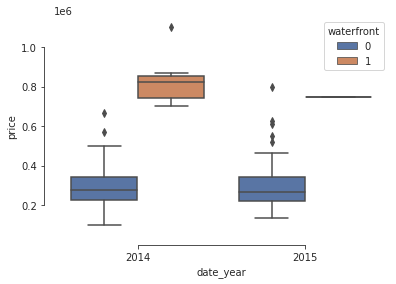

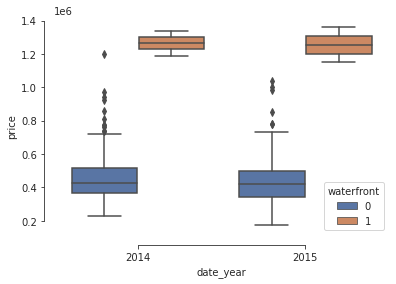

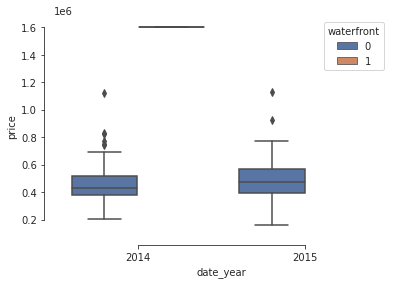

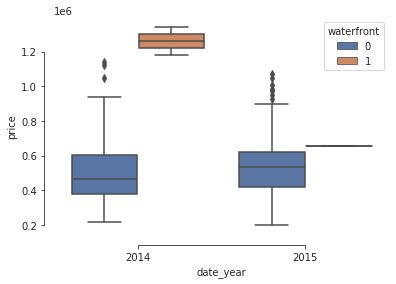

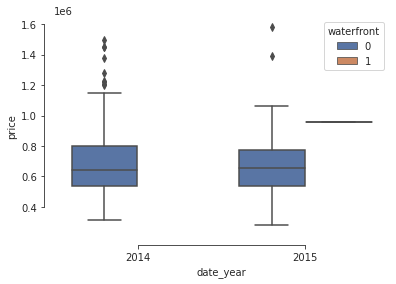

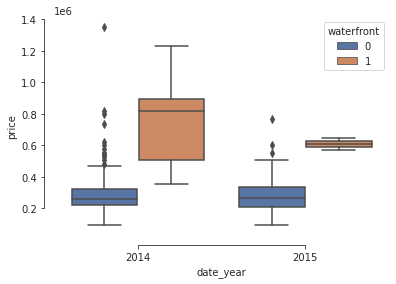

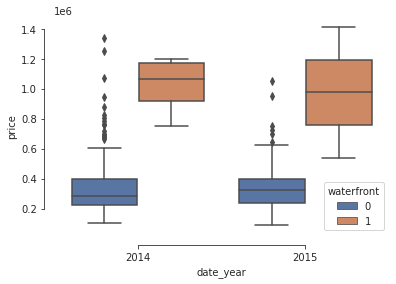

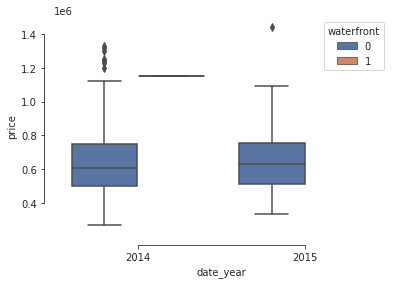

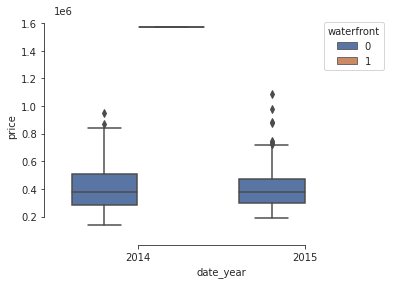

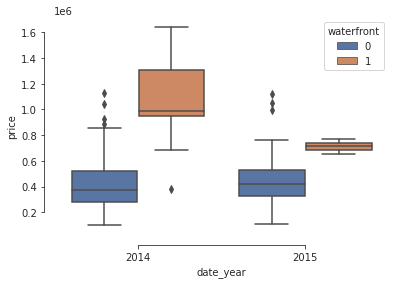

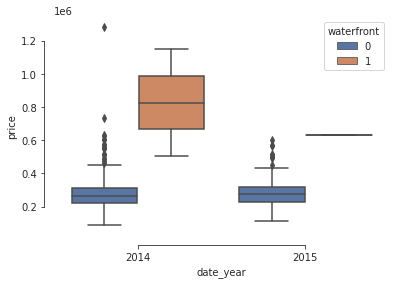

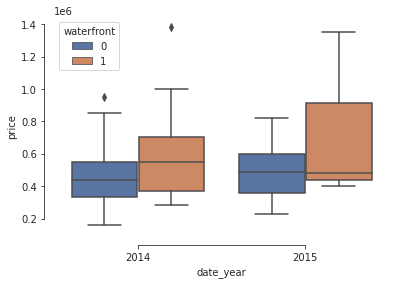

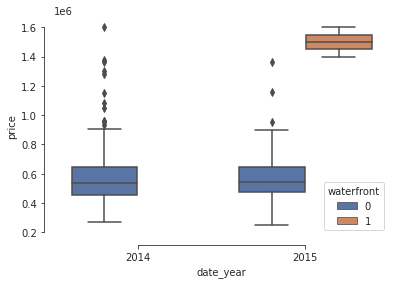

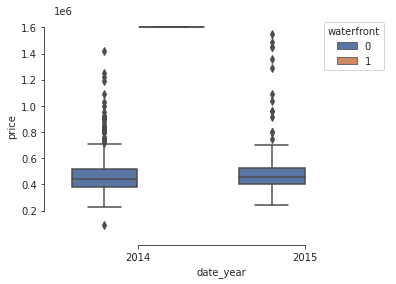

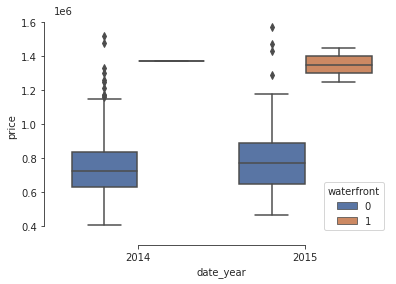

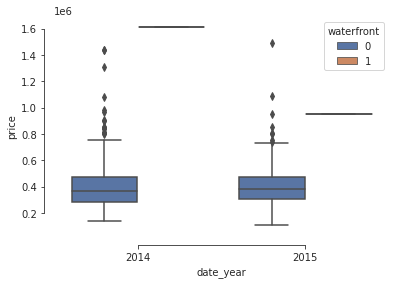

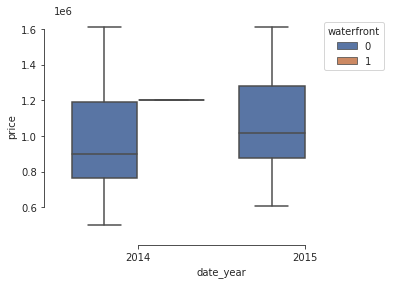

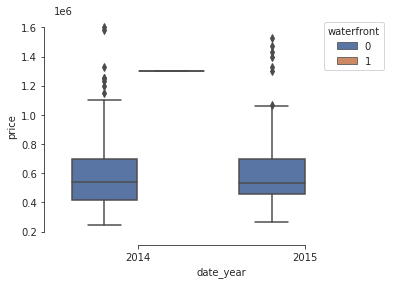

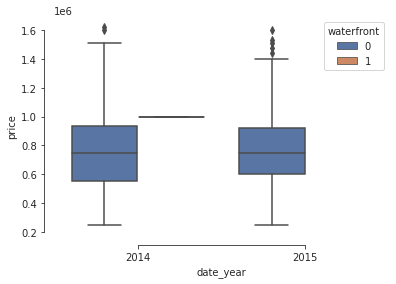

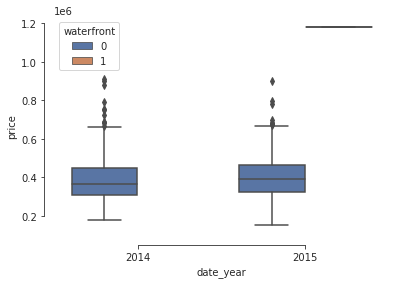

In [9]:
zipcodes = processed_df['zipcode'].unique()

sns.set_palette(palette='pastel')

for zip in zipcodes:
    zipcode_df = processed_df[(processed_df['zipcode'] == zip)]
    if zipcode_df['waterfront'].max() == 1.0:
        plot_grouped_boxplot('date_year', 'price', 'waterfront', zipcode_df, 'deep') 

###  Explore home living area and lot compared to neighbors 

In [10]:
print("--- df shape---")
print(processed_df.shape)
print("--- no difference between home/lot and neighbors ---")
print(processed_df[processed_df['sqft_living15_diff'] == 0].shape)
print(processed_df[processed_df['sqft_lot15_diff'] == 0].shape)
print("---- home/lot LARGER than neighbors---")
print(processed_df[processed_df['sqft_living15_diff'] > 0].shape)
print(processed_df[processed_df['sqft_lot15_diff']>0].shape)
print("---- home/lot SMALLER than neighbors---")
print(processed_df[processed_df['sqft_living15_diff'] < 0].shape)
print(processed_df[processed_df['sqft_lot15_diff']<0].shape)

--- df shape---
(21015, 28)
--- no difference between home/lot and neighbors ---
(2521, 28)
(4389, 28)
---- home/lot LARGER than neighbors---
(9440, 28)
(8297, 28)
---- home/lot SMALLER than neighbors---
(9054, 28)
(8329, 28)
